# 주제 : 차량 대출 상환가능성 예측

- ID,고객 대출 신청 ID
- Client_Income,고객 소득() : DROP
- Car_Owned,다른 차량에 대한 대출을 신청하기 전에 고객이 소유한 모든 차량(0은 아니요, 1은 그렇지 않음을 의미)
- Bike_Owned,고객이 소유한 모든 자전거(0은 아니요, 1은 그렇지 않음을 의미)
- Active_Loan,대출 신청 당시 진행 중인 다른 대출이 있는지 여부(0은 아니요, 1은 그렇지 않음을 의미)
- House_Own,고객이 소유한 주택 수(0은 아니요, 1은 그 외의 주택)
- Child_Count,고객이 보유한 자녀 수
- Credit_Amount,대출의 신용 금액()
- Loan_Annuity,대출 연금()
- Accompany_Client,고객이 대출을 신청할 때 고객과 동행한 사람
- Client_Income_Type,고객 소득 유형
- Client_Education,고객이 달성한 최고 교육 수준
- Client_Marital_Status,"고객의 결혼 상태(D- 이혼, S- 미혼, M- 기혼, W- 사별)"
- Client_Gender,고객의 성별
- Loan_Contract_Type,"대출 유형(CL- 현금대출, RL- 리볼빙대출)"
- Client_Housing_Type,고객 주택 상황
- Population_Region_Relative,고객이 거주하고 있는 지역의 상대적 인구수. 값이 높을수록 고객이 인구가 많은 지역에 거주하고 있음을 의미합니다.
- Age_Days,신청서 제출 시점의 고객 나이
- Employed_Days,"신청 전, 고객이 수입을 시작한 일수"
- Registration_Days,"대출 신청일 전, 고객이 등록을 변경한 일수"
- ID_Days,"대출 신청 며칠 전, 고객이 대출을 신청한 신분증을 변경했습니다."
- Own_House_Age,고객 소유 주택의 나이(년)
- Mobile_Tag,고객이 제공한 휴대폰 번호(1은 예, 0은 아니오를 의미) : drop
- Homephone_Tag,고객이 제공한 집전화 번호(1은 예, 0은 아니오를 의미)
- Workphone_Working,직장 전화 번호로 연락 가능했는지(1은 예, 0은 아니오)
- Client_Occupation,고객 직업 유형
- Client_Family_Members,고객이 보유한 가족 구성원 수
- Cleint_City_Rating,고객 도시 등급. 3은 최고, 2는 좋음, 1은 평균을 나타냅니다.
- Application_Process_Day,고객이 대출을 신청한 요일(0-일,1-월,2-화,3-수,4-목,5-금,6-토)"
- Application_Process_Hour,고객이 대출을 신청한 요일 시간 : DROP
- Client_Permanent_Match_Tag,고객 연락처 주소가 영구 주소와 일치하지 않는 경우 표시.
- Client_Contact_Work_Tag,고객 직장 주소가 연락처 주소와 일치하지 않는 경우 표시.
- Type_Organization,클라이언트가 근무하는 조직 유형
- Score_Source_1,다른 출처에서 얻은 점수. 정규화된 점수입니다.
- Score_Source_2,다른 출처에서 얻은 점수입니다. 정규화된 점수입니다.
- Score_Source_3,다른 소스에서 가져온 점수입니다. 정규화된 점수입니다.
- Social_Circle_Default,지난 60일 동안 대출 상환을 불이행한 고객의 친구/가족 수
- Phone_Change,"대출 신청 며칠 전에 고객이 휴대폰을 변경했는지"
- Credit_Bureau,작년 총 조회 건수
- Default,1은 고객이 대출 상환을 불이행했음을 의미하고 0은 그렇지 않음을 의미합니다.

## 결측치가 만건 이상인 컬럼명
- Own_House_Age,고객 소유 주택의 나이(년) : drop
- Client_Occupation,고객 직업 유형 : Nojob :: DROP
- Type_Organization,클라이언트가 근무하는 조직 유형 : drop
- Score_Source_1,다른 출처에서 얻은 점수. 정규화된 점수입니다. : drop
- Score_Source_3,다른 소스에서 가져온 점수입니다. 정규화된 점수입니다. : drop
- Social_Circle_Default,지난 60일 동안 대출 상환을 불이행한 고객의 친구/가족 수 : drop
- Credit_Bureau, 1년 내 90일 이상 장기연체 등 신용위험이 발생할 가능성을 수치화하여 제공하는 지표 : 평균

## 결측치가 만 건 미만인 컬럼명
- Accompany_Client,고객이 대출을 신청할 때 고객과 동행한 사람 : Drop
- Client_Income_Type,고객 소득 유형 : Drop
- Client_Education,고객이 달성한 최고 교육 수준 : Random
- Client_Marital_Status,"고객의 결혼 상태(D- 이혼, S- 미혼, M- 기혼, W- 사별)" : Random
- Client_Gender,고객의 성별 : Random
- Loan_Contract_Type,"대출 유형(CL- 현금대출, RL- 리볼빙대출)" : Random
- Client_Housing_Type,고객 주택 상황 : Random

## 라이브러리 import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 전처리 모듈들
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import  model_selection
from sklearn.model_selection import train_test_split
from Preprocessing import Preprocessing
from imblearn.over_sampling import SMOTE

# 모델 모듈
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from vecstack import stacking, StackingTransformer
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, mean_squared_error, classification_report

from tensorflow.keras import utils
import tensorflow as tf
# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics


<br>
<br>

# 전처리

In [2]:
category_columns = [
    'Car_Owned', 'Bike_Owned', 'Active_Loan', 
    'House_Own', 'Homephone_Tag', 'Workphone_Working', 
    'Cleint_City_Rating', 'Application_Process_Day', 'Client_Permanent_Match_Tag', 
    'Client_Contact_Work_Tag']

In [3]:
category_columns_object = [
    'Client_Education', 'Client_Marital_Status', 
    'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 
    'Client_Occupation']

In [4]:
numerical_columns=[
    'Child_Count', 'Credit_Amount', 'Loan_Annuity', 
    'Population_Region_Relative', 'Age_Days', 'Employed_Days', 
    'Registration_Days', 'ID_Days', 'Client_Family_Members',
    'Score_Source_2', 'Phone_Change', 'Credit_Bureau', 'Client_Income']

In [5]:
total_category_column = list()
for column in category_columns:
    total_category_column.append(column)
    
for column in category_columns_object:
    total_category_column.append(column)

In [6]:
# 인스턴스 생성
preprocessing_db = Preprocessing()
# 결측치 제거
preprocessing_db.drop_columns()
# 연속형 데이터 대체
preprocessing_db.numerical_columns_replace()
# 범주형 데이터 대체ㅐ
preprocessing_db.category_columns_replace()

In [7]:
data_df = preprocessing_db.get_df()
target_df = preprocessing_db.get_target_df()

In [8]:
data_df.head(3)

,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,...,Application_Process_Day_1.0,Application_Process_Day_2.0,Application_Process_Day_3.0,Application_Process_Day_4.0,Application_Process_Day_5.0,Application_Process_Day_6.0,Client_Permanent_Match_Tag_No,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_No,Client_Contact_Work_Tag_Yes
0,0.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,...,0,0,0,0,0,1,0,1,0,1
1,0.0,15282.00,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,...,0,0,1,0,0,0,0,1,0,1
2,1.0,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,Family,0.022800,...,0,0,0,1,0,0,0,1,0,1


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, test_size=0.3, random_state=42)

In [10]:
numeric_transformer = StandardScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown='ignore') 

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, total_category_column)])

In [11]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # preprocessing-only

In [12]:
preprocessor_pipe.fit(x_train)

ValueError: A given column is not a column of the dataframe

In [24]:
x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

In [73]:
oversample = SMOTE(random_state=42)

x_train_over, y_train_over = oversample.fit_resample(x_train_transformed, y_train)

<br>
<br>

# 모델
1. stacking

In [27]:
estimators = [ 
    ('ExtraTrees', ensemble.ExtraTreesClassifier(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3)),
    ('RandomForest', ensemble.RandomForestClassifier(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3)),
    ('DecisionTree', DecisionTreeClassifier()),
]

In [28]:
stack = StackingTransformer(estimators, 
                            regression = False, 
                            metric = accuracy_score,
                            n_folds = 2, stratified = True, shuffle = True, 
                            random_state = 42, verbose = 2) 

In [78]:
# fit을 통해 분류함
stack = stack.fit(x_train_over, y_train_over)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    fold  0:  [0.69438208]
    fold  1:  [0.69137157]
    ----
    MEAN:     [0.69287682] + [0.00150526]

estimator  1: [RandomForest: RandomForestClassifier]
    fold  0:  [0.73860853]
    fold  1:  [0.73774110]
    ----
    MEAN:     [0.73817481] + [0.00043372]

estimator  2: [DecisionTree: DecisionTreeClassifier]
    fold  0:  [0.88127615]
    fold  1:  [0.88028115]
    ----
    MEAN:     [0.88077865] + [0.00049750]



In [79]:
# transform을 통해 학습시킴
S_train = stack.transform(x_train_over)
# transform을 통해 학습시킴
S_test = stack.transform(x_test_transformed)

Train set was detected.
Transforming...

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  1: [RandomForest: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  2: [DecisionTree: DecisionTreeClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

Transforming...

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  1: [RandomForest: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE

estimator  2: [DecisionTree: DecisionTreeClassifier]
    model from fold  0: done
    model from fold  1: done
    ----
    DONE



In [80]:
# XGBClassification의 hyper-parameter
params = {
    'learning_rate' : [1, 0.1, 0.01, 0.001],
    'n_estimators' : [100, 1000],
    'max_depth' : [3, 4, 5],
    'eval_metric' : ['mlogloss'],
    'n_jobs' : [-1],
    'seed' : [0],
}

In [82]:
# GridSearch를 통해 HPO 찾기
grid = GridSearchCV(
    XGBClassifier(),
    params,
    refit=True, verbose=1
)
y_pred = grid.fit(S_train, y_train_over)
y_pred.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'eval_metric': 'mlogloss',
 'learning_rate': 1,
 'max_depth': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'seed': 0}

In [83]:
# HPO 적용
model = XGBClassifier(**y_pred.best_params_) 
# 투표를 통해 얻은 S_train과 y_train을 다시 학습시킴
model = model.fit(S_train, y_train_over)

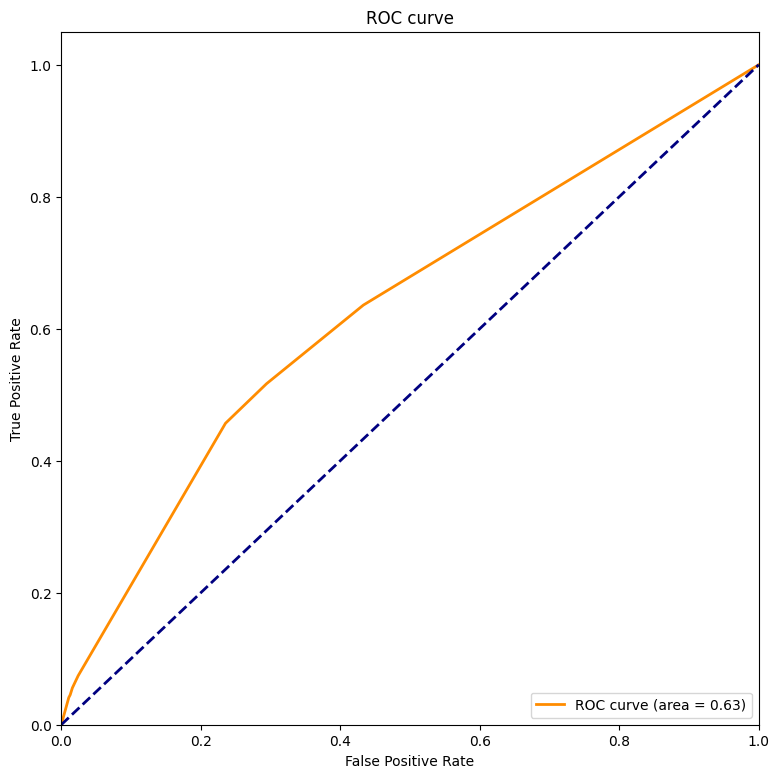

In [84]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=model.predict_proba(S_test)[:,1])
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [85]:
predictions = model.predict(S_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     33619
           1       0.21      0.07      0.11      2938

    accuracy                           0.90     36557
   macro avg       0.57      0.53      0.53     36557
weighted avg       0.87      0.90      0.88     36557



<br>
<br>

# 모델
2. SVM

In [87]:
params = {
    'C' : [1, 10, 100, 1000],
    'kernel' : ['rbf'],
    'gamma' : [0.1, 0.01, 0.001],
    'max_iter' : [3, 4, 5],
}

In [88]:
# GridSearch를 통해 HPO 찾기
grid = GridSearchCV(
    svm.SVC(),
    params,
    refit=True, verbose=1
)
y_pred = grid.fit(x_train_over, y_train_over)
y_pred.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 3}

In [89]:
scv = svm.SVC(**y_pred.best_params_)

In [91]:
scv.fit(x_train_over, y_train_over)

SVC(C=10, gamma=0.1, max_iter=3)

In [93]:
pridict_y = scv.predict(x_test_transformed)

In [94]:
print(classification_report(y_test, pridict_y))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71     33619
           1       0.10      0.52      0.16      2938

    accuracy                           0.57     36557
   macro avg       0.52      0.55      0.44     36557
weighted avg       0.87      0.57      0.67     36557



<br>
<br>

# 모델
3. xgboost

In [97]:
model = XGBClassifier()

In [98]:
model.fit(x_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
pridict_y = model.predict(x_test_transformed)

In [100]:
print(classification_report(y_test, pridict_y))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33619
           1       0.36      0.02      0.04      2938

    accuracy                           0.92     36557
   macro avg       0.64      0.51      0.50     36557
weighted avg       0.88      0.92      0.88     36557



<br>
<br>

# 모델
4. RandomForest

In [112]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [113]:
# y값 예측하기
pridict_y = rfc.predict(x_test_transformed)

In [114]:
print(classification_report(y_test, pridict_y))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     33619
           1       0.91      0.11      0.20      2938

    accuracy                           0.93     36557
   macro avg       0.92      0.56      0.58     36557
weighted avg       0.93      0.93      0.90     36557



<br>
<br>

# 모델
5. DesisionTree

In [115]:
clf = DecisionTreeClassifier(
            criterion='entropy', ## 'gini', 'log_loss'
            splitter='best', ## 'random'
            max_depth=100, ## '최대 깊이'
            min_samples_leaf=1, ## 최소 끝마디 샘플 수
            random_state=100
        ).fit(x_train_over, y_train_over)

In [116]:
# y값 예측하기
pridict_y = rfc.predict(x_test_transformed)

In [117]:
print(classification_report(y_test, pridict_y))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     33619
           1       0.91      0.11      0.20      2938

    accuracy                           0.93     36557
   macro avg       0.92      0.56      0.58     36557
weighted avg       0.93      0.93      0.90     36557

